In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [13]:
#Implementing Thompson Sampling
import random

N = 10000
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0
for n in range (N): 
  ad = 0
  max_random = 0
  for i in range (d):
    random_beta = random.betavariate(number_of_rewards_1[i]+1 , number_of_rewards_0[i]+1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i

  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if reward == 1:
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1
  total_reward += reward

In [14]:
print(total_reward)

2612


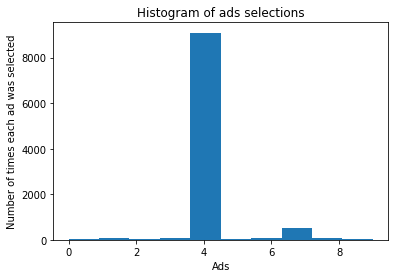

In [15]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()